In [9]:
import os
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.datasets import mnist
from tensorflow.keras.initializers import *
from tensorflow.keras.callbacks import *

In [10]:
def create_model(x):
    model = Sequential([
                        Conv2D(32, kernel_size=(3,3), strides=(1,1), input_shape=x.shape[1:], padding='same'),
                        BatchNormalization(),
                        Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same'),
                        BatchNormalization(),
                        Activation('relu'),
                        AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                        
                        Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same'),
                        Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same'),
                        Activation('relu'),
                        AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
        
                        Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same'),
                        BatchNormalization(),
                        Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same'),
                        BatchNormalization(),
                        Activation('relu'),
        
                        Flatten(),
                        Dense(10, activation='softmax')
                       ])
    
    model.compile(
                  optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                 )
    
    return model

In [11]:
def random_prediction(model, X, n=3):
    rand = np.random.randint(len(X),size=n)
    
    for i in range(0,n):
        predictions = model.predict(x_test)
        plt.imshow(X[rand[i]].reshape(28,28), cmap= plt.cm.binary)
        plt.show()
        print("Prediction of the model:", np.argmax(predictions[rand[i]]), "\n")

In [12]:
def plot_accuracy_and_loss(training, epochs):
    x_axis = np.linspace(0, epochs-1, epochs)
    plt.figure(figsize=(6, 3))
    plt.ylim(-0.2,0.45)
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.plot(x_axis, training.history['loss'], 'xb-')
    plt.plot(x_axis, training.history['val_loss'], 'xr-')
    plt.legend(['train', 'test'])
    plt.show()
    
    plt.figure(figsize=(6, 3))
    plt.ylim(0.7,1.25)
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.plot(x_axis, training.history['accuracy'], 'xb-')
    plt.plot(x_axis, training.history['val_accuracy'], 'xr-' )
    plt.legend(['train', 'test'])
    plt.show()

## load and prepare data

In [16]:
(x_train_original, y_train), (x_test_original, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train_original, axis=1)
x_test = tf.keras.utils.normalize(x_test_original, axis=1)

x_train = x_train.reshape((-1, 28,28, 1))
x_test = np.expand_dims(x_test, axis=-1) # same as reshape((-1,28,28,1))

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

width, height, depth = x_train.shape[1:]

In [17]:
EPOCHS = 20
BATCH_SIZE = 256

model = create_model(x_train)

In [18]:
training = model.fit(
                     x_train,
                     y_train,
                     batch_size=BATCH_SIZE, 
                     epochs=EPOCHS,
                     validation_data=(x_test, y_test))

model.summary() 

Epoch 1/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1368 - accuracy: 0.9582 - val_loss: 1.7182 - val_accuracy: 0.3487
Epoch 2/20
235/235 [==============================] - 3s 15ms/step - loss: 0.0431 - accuracy: 0.9872 - val_loss: 0.2075 - val_accuracy: 0.9336
Epoch 3/20
235/235 [==============================] - 3s 15ms/step - loss: 0.0334 - accuracy: 0.9894 - val_loss: 0.0330 - val_accuracy: 0.9895
Epoch 4/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0255 - accuracy: 0.9916 - val_loss: 0.0409 - val_accuracy: 0.9877
Epoch 5/20
235/235 [==============================] - 3s 15ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.0288 - val_accuracy: 0.9915
Epoch 6/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0171 - accuracy: 0.9943 - val_loss: 0.0560 - val_accuracy: 0.9867
Epoch 7/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.0360 - val_accuracy: 0.9894

In [19]:
print("Test set result after whole training")
validation = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)

Test set result after whole training
40/40 [==============================] - 0s 6ms/step - loss: 0.0551 - accuracy: 0.9868


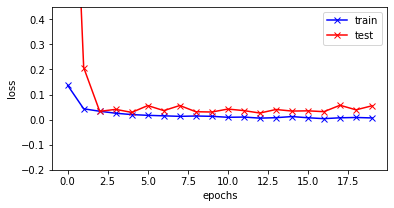

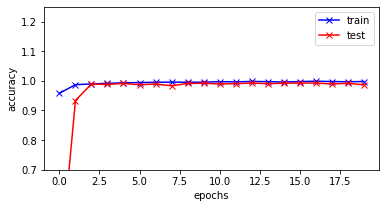

In [20]:
plot_accuracy_and_loss(training, EPOCHS)

Pick randomly images and predict their result:


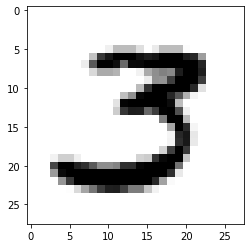

Prediction of the model: 3 



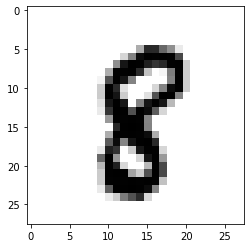

Prediction of the model: 8 



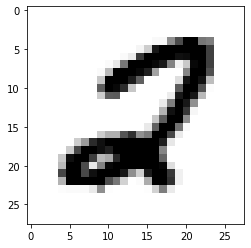

Prediction of the model: 2 



In [22]:
print("Pick randomly images and predict their result:")
random_prediction(model, x_test_original)